In [4]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder

Mapping files: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 26.56it/s]


The proportion of 0's in the genomic dataset is 33.34 %
The proportion of 1's in the genomic dataset is 33.34 %
The proportion of 2's in the genomic dataset is 33.32 %
The proportion of NaN's in the genomic dataset is 0.00 %
The proportion of having gout is 0.41


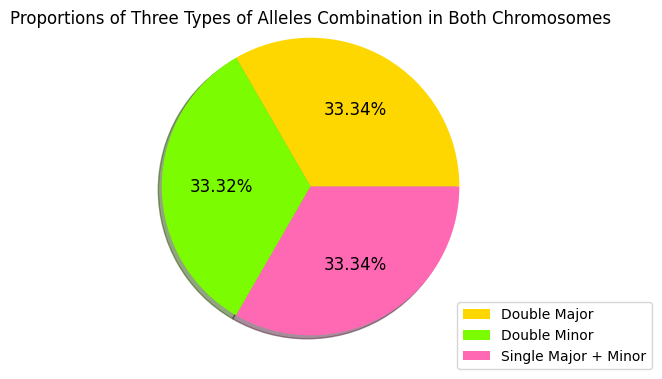

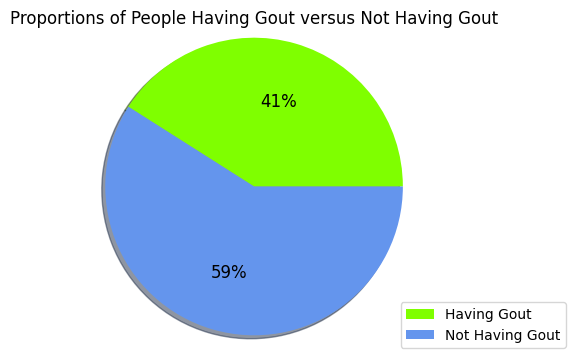

Mapping files: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32.99it/s]
C:\Users\tuanh\AppData\Local\Temp\ipykernel_4056\2141829978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_sex'] = np.select([df['sex'] == "Male" , df['sex'] == "Female"], [1, 2])
C:\Users\tuanh\AppData\Local\Temp\ipykernel_4056\2141829978.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  phenos_tensor = torch.Tensor(list(df.values))
C:\Users\tuanh\AppData\Local\Temp\ip

In [5]:
%run Data_Processing.ipynb

In [6]:
X_train = tr_snv.numpy()

y_train = tr_gout.numpy()

X_test = te_snv.numpy()

y_test = te_gout.numpy()

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(np_tr_snv, np_tr_gout, test_size = .2)

In [8]:
import time

start_time = time.time()

In [9]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\tuanh\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
model.intercept_

array([-7.75390944e-05])

In [11]:
model.coef_

array([[ 0.02700802, -0.02821026, -0.02263219, ...,  0.00912159,
         0.00295599, -0.00979343]])

In [12]:
y_pred = model.predict(X_test) 

y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [13]:
score = model.score(X_test, y_test)

print(score)

0.5964


In [14]:
matrix = confusion_matrix(y_test, y_pred)

matrix.diagonal()/matrix.sum(axis=1)

array([0.66848941, 0.49469624])

In [15]:
print(classification_report(y_test, y_pred, target_names = ['False', 'True'], digits=4))

              precision    recall  f1-score   support

       False     0.6511    0.6685    0.6597      1463
        True     0.5140    0.4947    0.5042      1037

    accuracy                         0.5964      2500
   macro avg     0.5826    0.5816    0.5819      2500
weighted avg     0.5943    0.5964    0.5952      2500



## One-Hot Encoding of the tokenised SNV data

In [16]:
encoder = OneHotEncoder()

In [17]:
X_train = tr_snv.numpy()

X_train_encoded = encoder.fit_transform(X_train)

In [18]:
X_train_encoded.shape

(6999, 5466)

In [20]:
X_train[1,]

array([ 5,  3,  5, ..., 17, 18,  3])

In [21]:
X_train_encoded[1,]

<1x5466 sparse matrix of type '<class 'numpy.float64'>'
	with 2000 stored elements in Compressed Sparse Row format>